# calculating the Yield of a given solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append("../")

from check_solution import *
from yield_mc_simulation import *

# import pandas as pd

In [13]:
from parsing import parse_csv

G = parse_csv("solutions/google/", cz=False)


The drive frequency are CR compatible


In [14]:
# thresholds
d = np.array([0.017, 0.03 , 0.03 , 0.017, 0.03 , 0.002, 0.017, 0.025, 0.017])

## Helper function

In [15]:
from frequency_graph import FrequencyGraph

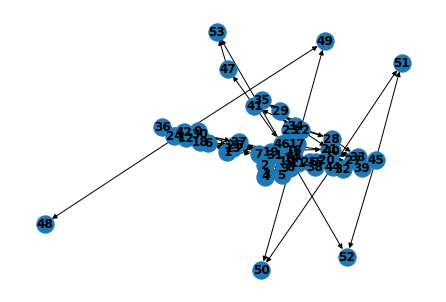

In [16]:

G.check_constraint(d, qutrit=False)
G.plot()

In [17]:
d
keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "F1", "F2", "M1"]
d_dict = { k: dd for (k, dd) in zip(keys, d)}
d_dict

{'A1': 0.017,
 'A2i': 0.03,
 'A2j': 0.03,
 'E1': 0.017,
 'E2': 0.03,
 'E4': 0.002,
 'F1': 0.017,
 'F2': 0.025,
 'M1': 0.017}

In [18]:
# d
# keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "E1t", "E2t", "E4t", "F1", "F2", "M1"]
# d_dict = { k: dd for (k, dd) in zip(keys, d)}
    

In [19]:
cr_keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4","C1", "C1b", "F1", "F2", "M1"]

In [20]:
cstr_key = cr_keys
# cstr_key = None

["abs(freqs[i] - freqs[j]) > d['A1']", "abs(freqs[i] - freqs[j] - alpha[j]) > d['A2i']", "abs(freqs[j] - freqs[i] - alpha[i]) > d['A2j']", "abs(freqs[j] - freqs[i]) > d['E1']", "abs(freqs[j] - freqs[i]-alpha[i]) > d['E2']", "abs(freqs[j] - freqs[i] - alpha[i]/2) > d['E4']", 'freqs[i] + alpha[i] < freqs[j]', 'freqs[i] > freqs[j] ', "abs(freqs[j] - freqs[k]) > d['F1']", "abs(freqs[j] - freqs[k] - alpha[k]) > d['F2']", "abs(freqs[j] + freqs[k] - 2*freqs[i] - alpha[i]) > d['M1']"]


/Users/amorvan/opt/anaconda3/envs/ortools/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Qubit collisions:
yield   = 0.0
average = 47.90483666666667


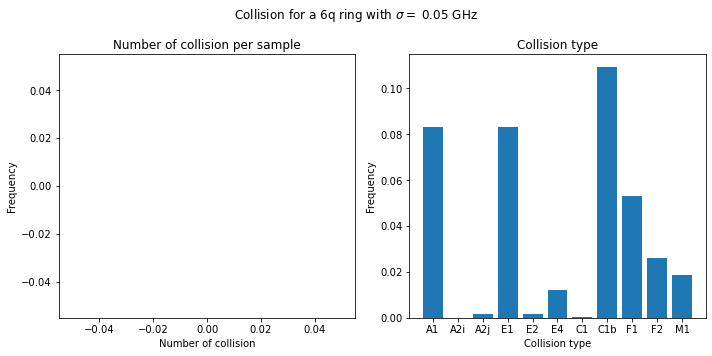

In [21]:
# parametrization
Nsamples = 300000
sigma = 0.05

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot of the yield
ax = axs[0]
collisions, c, idx_list, constraints = G.get_collision(d_dict, sigma=sigma, qutrit=False, cstr=cstr_key, Nsamples=Nsamples)

idx_len = [len(idx) for idx in idx_list]
cstr_list = []
for ct, ilen in zip(constraints, idx_len):
    cstr_list += [ct]*ilen 


ax.hist(collisions, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], density=True)
# ax.hist(collisions, density=True)

#legend
ax.set_xlabel("Number of collision")
ax.set_ylabel("Frequency")
ax.set_title("Number of collision per sample")

print("Qubit collisions:")
print(f"yield   = {np.sum(collisions==0)/len(collisions)}")
print(f"average = {np.sum(collisions)/len(collisions)}")

# histogram of the type of errors
ax = axs[1]
c = np.array(c)
cc = np.sum(~np.array(c), axis=1)
v = [sum(idx_len[:k]) for k in range(len(idx_len)+1)]
col = np.array([np.mean(cc[v[i]: v[i+1]]) for i in range(len(v)-1)])/Nsamples

ax.bar(np.arange(11), col)
ax.set_xticks(np.arange(11))
ax.set_xticklabels(cr_keys)

ax.set_xlabel('Collision type')
ax.set_ylabel('Frequency')

ax.set_title("Collision type")

fig.suptitle(f"Collision for a 6q ring with $\sigma=$ {sigma} GHz")

fig.tight_layout()

In [22]:
x = [sum(idx_len[:k]) for k in range(len(idx_len)+1)]
xm = [(x[i] + x[i+1])/2 for i in range(len(x)-1)]

Text(0.5, 0, 'Collision type')

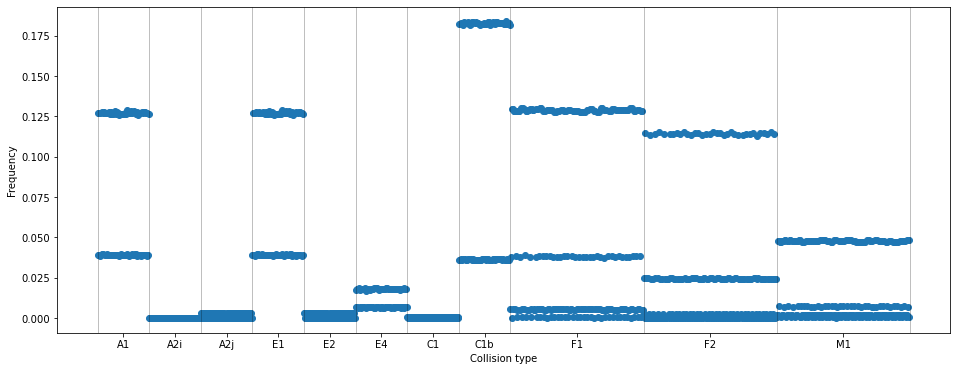

In [23]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(np.sum(~np.array(c), axis=1)/Nsamples, 'o')
for xx in x:
    ax.axvline(xx, color='k', linewidth=0.5, alpha = 0.5)
ax.set_xticks(xm);
ax.set_xticklabels(constraints)

ax.set_ylabel('Frequency')
ax.set_xlabel("Collision type")

In [24]:
True+True

2

["abs(freqs[i] - freqs[j]) > d['A1']", "abs(freqs[i] - freqs[j] - alpha[j]) > d['A2i']", "abs(freqs[j] - freqs[i] - alpha[i]) > d['A2j']", "abs(freqs[j] - freqs[i]) > d['E1']", "abs(freqs[j] - freqs[i]-alpha[i]) > d['E2']", "abs(freqs[j] - freqs[i] - alpha[i]/2) > d['E4']", 'freqs[i] + alpha[i] < freqs[j]', 'freqs[i] > freqs[j] ', "abs(freqs[j] - freqs[k]) > d['F1']", "abs(freqs[j] - freqs[k] - alpha[k]) > d['F2']", "abs(freqs[j] + freqs[k] - 2*freqs[i] - alpha[i]) > d['M1']"]
["abs(freqs[i] - freqs[j]) > d['A1']", "abs(freqs[i] - freqs[j] - alpha[j]) > d['A2i']", "abs(freqs[j] - freqs[i] - alpha[i]) > d['A2j']", "abs(freqs[j] - freqs[i]) > d['E1']", "abs(freqs[j] - freqs[i]-alpha[i]) > d['E2']", "abs(freqs[j] - freqs[i] - alpha[i]/2) > d['E4']", 'freqs[i] + alpha[i] < freqs[j]', 'freqs[i] > freqs[j] ', "abs(freqs[j] - freqs[k]) > d['F1']", "abs(freqs[j] - freqs[k] - alpha[k]) > d['F2']", "abs(freqs[j] + freqs[k] - 2*freqs[i] - alpha[i]) > d['M1']"]
["abs(freqs[i] - freqs[j]) > d['A1']

(0.0, 100.0)

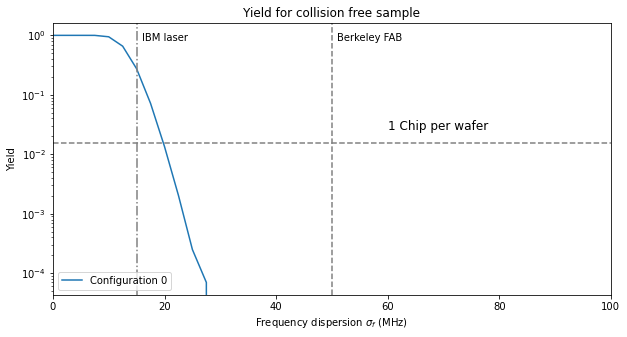

In [25]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))

# N_samples
Nsamples=100000

# varying the dispersion of the frequency
s_vec = np.linspace(0, 0.1, 41)

# saving the results
collisions = np.array([G.get_collision(d_dict, Nsamples=Nsamples, sigma=s, cstr=cstr_key)[0] for s in s_vec])

n_collisions = [0]
y = [(Nsamples-np.count_nonzero(collisions-n, axis=1))/Nsamples for n in n_collisions]

ax.plot(s_vec*1e3, y[0], label=f'Configuration {0}')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per wafer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

In [45]:
constraints

['A1', 'A2i', 'A2j', 'E1', 'E2', 'E4', 'C1', 'C1b', 'F1', 'F2', 'M1']

In [18]:
c[0].shape

(10000,)

(0.0, 100.0)

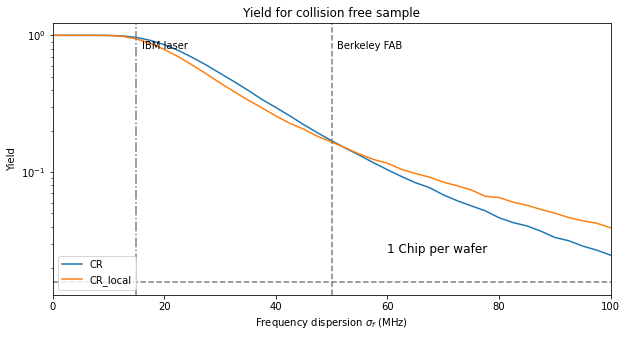

In [36]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))



ax.plot(s_vec*1e3, y[0], label=f'CR')
ax.plot(s_vec*1e3, y0[0], label=f'CR_local')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per wafer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

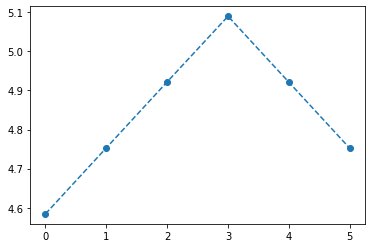

In [125]:
fig, ax = plt.subplots()
ax.plot(freqs, 'o--')

In [19]:
y0 = y

# Simulation a single yeild

In [41]:

fnames = [
    "solutions/6nodes/orientation%3D1_alphaLB%3D-0.27_alphafree",
    "solutions/6nodes/orientation%3D2_alphaLB%3D-0.27_alphafree",
    "solutions/6nodes/orientation%3D3_alphaLB%3D-0.27_alphafree"
         ]
graphs = [[(0, 1), (1, 2),(2, 3), (4, 3), (5, 4), (0, 5)],
          [(0, 1), (1, 2),(3, 2), (3, 4), (5, 4), (0, 5)],
          [(0, 1), (2, 1),(2, 3), (4, 3), (4, 5), (0, 5)]]

NameError: name 'fnames' is not defined

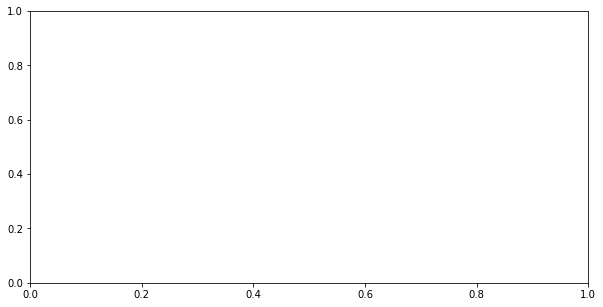

In [14]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))

for j, (fname, g) in enumerate(zip(fnames, graphs)):

    freqs, a, d = extract_solution(fname)
    N = len(freqs)

    G = FrequencyGraph(g, freqs, a)
    
    # N_samples
    Nsamples=100000

    # varying the dispersion of the frequency
    s_vec = np.linspace(0, 0.1, 41)

    # saving the results
    collisions = np.array([G.get_collision(d, Nsamples=Nsamples, sigma=s) for s in s_vec])

    n_collisions = [0]
    y = [(Nsamples-np.count_nonzero(collisions-n, axis=1))/Nsamples for n in n_collisions]
    
    ax.plot(s_vec*1e3, y[0], label=f'Configuration {j}')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

(0.0, 100.0)

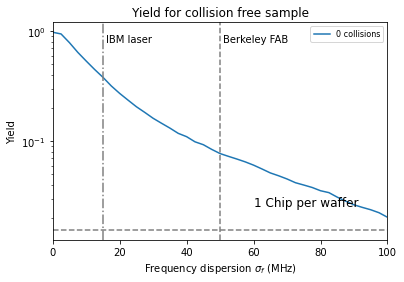

In [11]:
fig, ax = plt.subplots()
for i in range(len(n_collisions)):
    ax.plot(s_vec*1e3, y[i], label=f'{n_collisions[i]} collisions')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=2, fontsize=8)

ax.set_xlim(0, 100)

# Monte Carlo simulation of the Yield

In [32]:
# construct the graph
target_frequencies = np.array([G.nodes[n]['freq'] for n in G.nodes], dtype=np.float32)
target_alpha = np.array([G.nodes[n]['a'] for n in G.nodes], dtype=np.float32)

In [33]:
# N_samples
Nsamples=1000

# varying the dispersion of the frequency
s_vec = np.linspace(0, 0.05, 21)

# let say the alpha dispersion is small
s_alpha = 0.005

# saving the results
collisions = np.zeros((len(s_vec), Nsamples))

# loop through sigma
for i_s, s in enumerate(s_vec):

    freqs_distribution = generate_sample(target_frequencies, sigma=s, Nsamples=Nsamples)
    alpha_distribution = generate_sample(target_alpha, sigma=s_alpha, Nsamples=Nsamples)

    for i in range(Nsamples):
        G = nx.DiGraph()
        G.add_edges_from([(0, 1), (1, 2),(2, 3), (3, 4), (4, 5), (6, 5), (7, 6), (8, 7), (9, 8), (0, 9)])
        # G.add_edges_from([(1, 0), (2, 1),(3, 2), (4, 3), (5, 4), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0)])
        for k, n in enumerate(G.nodes):
            G.nodes[n]['freq'] = freqs_distribution[k, i]
            G.nodes[n]['a'] = alpha_distribution[k, i]
        collisions[i_s, i] = check(G, d, verbose=0)

IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
fig, ax = plt.subplots()
ax.hist(collisions[0, :], bins=[0,1,2,3,4,5,6,7, 8, 9, 10])
ax.hist(collisions[10, :], bins=[0,1,2,3,4,5,6,7, 8, 9, 10])

In [ ]:
y2 = (Nsamples-np.count_nonzero(collisions, axis=1))/Nsamples

In [ ]:
fig, ax = plt.subplots()
ax.plot(s_vec, y)
ax.plot(s_vec, y2)

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')

# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$')
ax.set_yscale('log')

In [51]:
yold = y

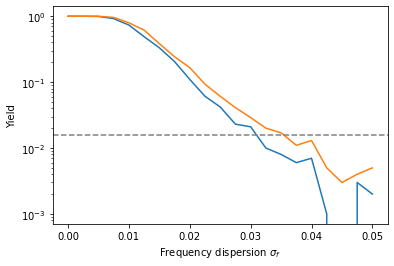

In [59]:
fig, ax = plt.subplots()
ax.plot(s_vec, y)
ax.plot(s_vec, yold)
# ax.plot(s_vec, y_ref)

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')

# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$')
ax.set_yscale('log')

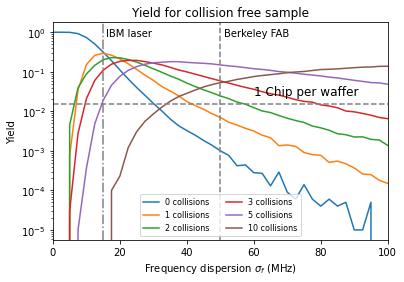

In [258]:
    # extracting the data
    freqs, a, d = extract_solution(fname)

    # construct the graph. here we suppose a 10 nodes graph with a specific Control-target geometry
    G = nx.DiGraph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5),
                      (6, 5), (7, 6), (8, 7), (9, 8), (0, 9)])
    for k, n in enumerate(G.nodes):
        G.nodes[n]['freq'] = freqs[k]
        G.nodes[n]['a'] = a[k]

    # checking the solution
    check(G, d)

    # construct the graph
    target_frequencies = np.array([G.nodes[n]['freq']
                                   for n in G.nodes], dtype=np.float32)
    target_alpha = np.array([G.nodes[n]['a']
                             for n in G.nodes], dtype=np.float32)

    # Plot the yield
    # N_samples
    Nsamples = 100000

    # varying the dispersion of the frequency
    s_vec = np.linspace(0, 0.1, 41)

    # let say the alpha dispersion is small
    s_alpha = 0.005

    # saving the results
    collisions = np.zeros((len(s_vec), Nsamples))

    # loop through sigma
    for i_s, s in enumerate(s_vec):

        freqs_distribution = generate_random_sample(
            target_frequencies, sigma=s,       Nsamples=Nsamples)
        alpha_distribution = generate_random_sample(
            target_alpha,       sigma=s_alpha, Nsamples=Nsamples)

        idx_list, expr_list = construct_constraint_function(
            G, freqs_distribution, alpha_distribution, d)

        c = []
        for idx, expr in zip(idx_list, expr_list):
            for i in idx:
                c.append(expr(*i))
        c = np.array(c)
        # counting the tiime where all the conditions are no validated
        collisions[i_s, :] = np.sum(~c, axis=0)

    n_collisions = [0, 1, 2, 3, 5, 10]
    y = [(Nsamples-np.count_nonzero(collisions-n, axis=1)) /
         Nsamples for n in n_collisions]

    fig, ax = plt.subplots()
    for i in range(len(n_collisions)):
        ax.plot(s_vec*1e3, y[i], label=f'{n_collisions[i]} collisions')

    # 1/64 limit
    ax.axhline(1/64, ls='--', color='Gray')
    ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

    ax.axvline(15, ls='-.', color='Gray')
    ax.text(16, 0.8, 'IBM laser')
    ax.axvline(50, ls='--', color='Gray')
    ax.text(51, 0.8, 'Berkeley FAB')
    # Legend and labels
    ax.set_ylabel(f'Yield')
    ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
    ax.set_yscale('log')
    ax.set_title('Yield for collision free sample')
    ax.legend(ncol=2, fontsize=8)

    ax.set_xlim(0, 100)
    plt.show()


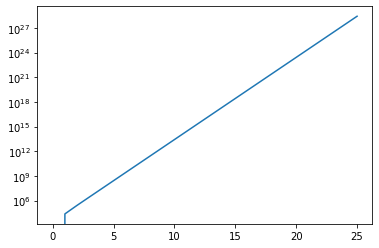

In [265]:
fig, ax = plt.subplots()
x = np.arange(10)

y = [0]
for k in range(25):
    y.append(y[k]*10+2*12000)
ax.plot(y)
ax.set_yscale('log')